# NTLK Quetes 1

#### Importe NLTK et télécharge les fonctions dont tu auras besoin (au fur et à mesure si nécessaire).
#### Récupère le texte d'un article de presse de ton choix sur internet (en anglais ce sera plus simple, mais tu peux prendre la langue de ton choix). 
#### Affecte-le à une variable via un copier/coller dans ton notebook. Par simplicité pour la suite de cette quête, nous te conseillons de prendre un texte qui fait entre 10 et 30 lignes environ. 
#### Transforme ton texte en tokens de phrases
#### Transforme ton texte en tokens de mots
#### Compte la fréquence d'apparition de chaque mot et réalise un graphique (si possible un diagramme en barre) qui représente les 20 mots les plus présents dans ton texte. Y a-t-il beaucoup de mots qui te semblent être des stopwords ?
#### Enlève les stop words et la ponctuation, et regarde à nouveau quels sont les mots les plus présents. Là encore, réalise le même graphique pour comparer.

In [27]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import os
import io
import random
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter


In [ ]:
# Télécharger le popular plus de 50min!!
nltk.download()


In [17]:
# Télécharger les stopwords en français
nltk.download('stopwords')
# Vérifier que les stopwords en français sont disponibles
print(stopwords.words('french'))

# Télécharger le corpus Punkt pour toekniser les phrases
nltk.download('punkt')
# Vérifier que les stopwords en français sont disponibles
# print(stopwords.words('french'))



['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\romar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



 fichier_to_test :
./le_bonheur.txt 


 token_phrases:
['Le bonheur, mes chers amis, est ce phare éternel vers lequel toutes les âmes naviguent avec espoir.', "Mais qu'est-ce que le bonheur, sinon l'harmonie entre l'homme et l'existence qu'il mène ?", "Ce n'est pas un lieu lointain ou un sommet à atteindre, mais plutôt un chemin sur lequel on marche, un ensemble de petits moments, une suite de respirations conscientes.", 'Socrate, dans son humilité, nous a enseigné que la connaissance de soi est la clé de la sagesse et, par extension, du bonheur.', 'Car en se connaissant, on comprend mieux ses désirs et on distingue les plaisirs éphémères des joies durables.', "Épicure, quant à lui, a souligné l'importance des plaisirs simples : le chant des oiseaux, la douceur d'une brise, la compagnie d'un bon ami.", "Il nous a invités à chercher le bonheur dans la modération et dans la liberté des tourments de l'âme.", "Et que dire de Sénèque, ce stoïcien qui a prôné la vertu, la patience et l'acce

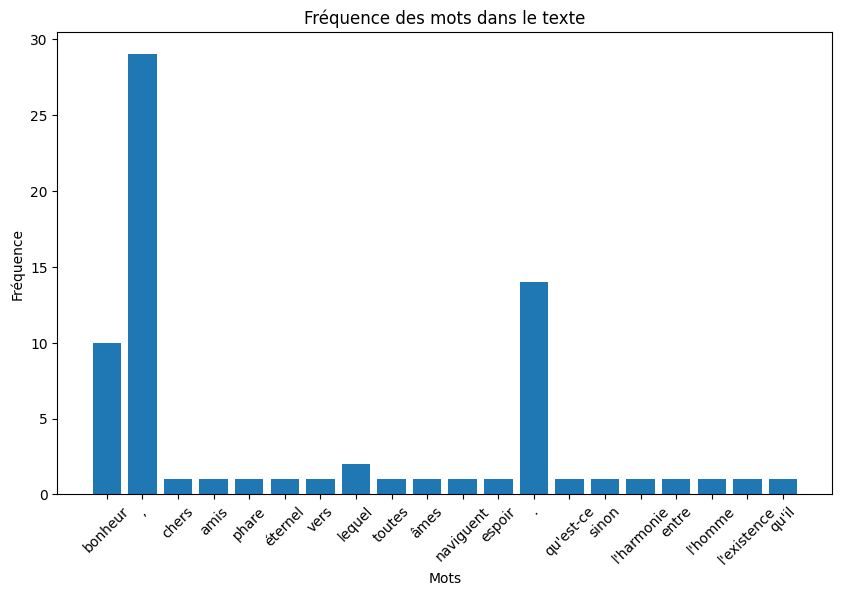


 Chemin du fichier :
./le_bonheur.txt 


 token_phrases:
['Le bonheur, mes chers amis, est ce phare éternel vers lequel toutes les âmes naviguent avec espoir.', "Mais qu'est-ce que le bonheur, sinon l'harmonie entre l'homme et l'existence qu'il mène ?", "Ce n'est pas un lieu lointain ou un sommet à atteindre, mais plutôt un chemin sur lequel on marche, un ensemble de petits moments, une suite de respirations conscientes.", 'Socrate, dans son humilité, nous a enseigné que la connaissance de soi est la clé de la sagesse et, par extension, du bonheur.', 'Car en se connaissant, on comprend mieux ses désirs et on distingue les plaisirs éphémères des joies durables.', "Épicure, quant à lui, a souligné l'importance des plaisirs simples : le chant des oiseaux, la douceur d'une brise, la compagnie d'un bon ami.", "Il nous a invités à chercher le bonheur dans la modération et dans la liberté des tourments de l'âme.", "Et que dire de Sénèque, ce stoïcien qui a prôné la vertu, la patience et l'ac

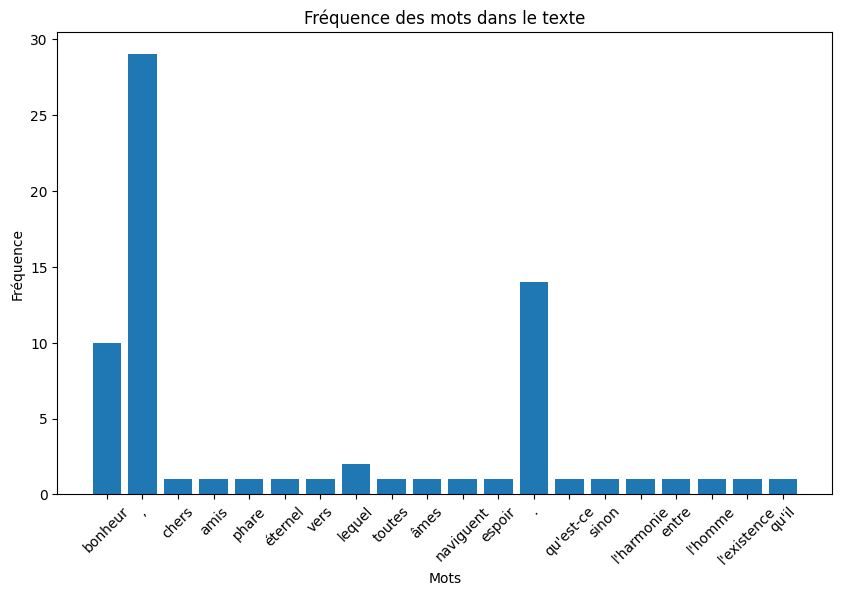

: 

In [36]:
# Définir le chemin d'accès au fichier
fichier_to_test = "./le_bonheur.txt"
print(f"\n fichier_to_test :\n{fichier_to_test} \n")

# Lire le fichier
with open("le_bonheur.txt", "r", encoding="utf-8") as file:
    fichier_to_test = file.read()


# Tokenisation par phrase
token_phrases=nltk.sent_tokenize(fichier_to_test)
print(f"\n token_phrases:\n{token_phrases} \n")
# Tokenisation par mots
tokens_words = nltk.word_tokenize(fichier_to_test, language="french")
print(f"\n tokens_words:\n{tokens_words} \n")

# Nettoyage des mots vides
stop_words = set(stopwords.words("french"))
print(f"\n stop_words:\n{stop_words} \n")

# Compter la fréquence des mots
freq_tokens_words = Counter(tokens_words)
print(f"\n freq:\n{freq_tokens_words}")


print(f"\n stop_words:\n{stop_words} \n")
# Compter la fréquence des mots
freq = Counter(tokens_clean)

# Préparer les données pour le graphique
mots = list(freq.keys())
frequences = list(freq.values())
# Créer un graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(mots[:20], frequences[:20])  # Affiche les 20 premiers mots pour la lisibilité
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Fréquence des mots dans le texte')
plt.xticks(rotation=45)
plt.show()

tokens_clean = [word for word in tokens_words if word.lower() not in stop_words]
# Afficher les tokens nettoyés
print(tokens_clean)

# Compter la fréquence des mots
freq = Counter(tokens_clean)
print(f"\n freq:\n{freq} \n")

# plt.figure(figsize=(8,6))
# fig=plt.plot(stop_words,tokens)





# Définir le chemin d'accès au fichier
chemin_fichier = "./le_bonheur.txt"
print(f"\n Chemin du fichier :\n{chemin_fichier} \n")

# Lire le fichier
with open(chemin_fichier, "r", encoding="utf-8") as file:
    contenu_fichier = file.read()

# Tokenisation par phrase
token_phrases = nltk.sent_tokenize(contenu_fichier)
print(f"\n token_phrases:\n{token_phrases[:10]} \n")  # Affiche les 10 premières phrases pour vérification

# Tokenisation par mots
tokens_words = nltk.word_tokenize(contenu_fichier, language="french")
print(f"\n tokens_words:\n{tokens_words[:20]} \n")  # Affiche les 20 premiers mots pour vérification

# Nettoyage des mots vides
stop_words = set(stopwords.words("french"))
tokens_clean = [word for word in tokens_words if word.lower() not in stop_words]
print(f"\n Tokens nettoyés:\n{tokens_clean[:20]} \n")  # Affiche les 20 premiers mots nettoyés pour vérification

# Compter la fréquence des mots
freq = Counter(tokens_clean)

# Préparer les données pour le graphique
mots = list(freq.keys())
frequences = list(freq.values())

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(mots[:20], frequences[:20])  # Affiche les 20 premiers mots pour la lisibilité
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Fréquence des mots dans le texte')
plt.xticks(rotation=45)
plt.show()
